<a href="https://colab.research.google.com/github/SpeedofLight007/churn-explorer_MLencoded/blob/main/MVP_Analise_de_Dados_e_Boas_Praticas_Churn_Explorer_MSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP Análise de Dados e Boas Práticas // Churn Explorer**

Nome: Marcelo Santos Araujo

Matrícula: 4052024002227

Dataset: Churn Explorer // Churn_Dataset.csv

# Tipo de Problema

**O Cuidado com o Cliente e a Dor da Despedida**

Imagine que, para uma empresa de telecomunicações, cada cliente é como um relacionamento construído com tempo e confiança. Quando um cliente decide cancelar seu serviço (o que chamamos de "churn"), não é apenas um número a menos; é como uma "despedida" dolorosa.

Para essas empresas, o churn é um dos indicadores mais importantes e temidos, por várias razões que tocam diretamente o coração do negócio:

***Impacto Financeiro Direto:*** Cada cliente que se vai leva consigo a receita mensal que pagava, e para reconquistar um cliente perdido ou atrair um novo, a empresa gasta muito mais em publicidade e promoções do que para manter um cliente feliz. É como se fosse mais caro fazer novos amigos do que cuidar dos que já se tem.

***Erosão da Base:*** Se muitos clientes começam a ir embora, a base da empresa encolhe, perdendo sua força e capacidade de crescimento no mercado.

***Sinal de Alerta:*** Um churn elevado é um grito de que algo não vai bem. Pode ser a qualidade do serviço, o preço, o atendimento, ou até mesmo cobranças que geram insatisfação. A empresa vê isso como um termômetro de sua própria saúde.

É por isso que este é um problema de classificação supervisionada de extrema importância: queremos identificar proativamente quais clientes estão mais propensos a "se despedir" antes que eles de fato o façam. Ao prever quem está em risco, a empresa pode estender a mão a tempo, oferecer soluções personalizadas e, acima de tudo, mostrar que se importa em manter aquele relacionamento, transformando uma possível "despedida" em uma história de sucesso e fidelidade.


---



# **Seleção de Dados**

O dataset utilizado foi obtido na Kaggle, que disponibiliza dados anonimizados de clientes de Serviços de telecomunicações. Este dataset foi escolhido por sua relevância para a previsão de churn e por conter uma variedade de atributos que podem influenciar a decisão de cancelamento do cliente."

# Atributos do Dataset



---



**O dataset contém 7.043 amostras, com 1.869 casos de churn e 5.174 casos de não churn. Possui os seguintes atributos:**

CustomerID: (Identificador único do cliente) - Categórico/Identificador

Gender: (Gênero do cliente: Male, Female) - Categórico

SeniorCitizen: (Indica se o cliente é idoso: Yes, No) - Booleano

Partner: (Indica se o cliente tem parceiro: Yes, No) - Booleano

Dependents: (Indica se o cliente tem dependentes: Yes, No) - Booleano

Tenure: (Meses que o cliente permaneceu com a empresa) - Numérico

PhoneService: (Indica se o cliente tem serviço telefônico: Yes, No) - Booleano

MultipleLines: (Indica se o cliente tem múltiplas linhas telefônicas: Yes, No, No phone service) - Categórico

InternetService: (Tipo de serviço de internet: DSL, Fiber optic, No) - Categórico

OnlineSecurity: (Indica se o cliente tem segurança online: Yes, No, No internet service) - Categórico

Contract: (Tipo de contrato: Month-to-month, One year, Two year) - Categórico

PaymentMethod: (Método de pagamento: Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) - Categórico

MonthlyCharges: (Cobrança mensal total) - Numérico

TotalCharges: (Cobrança total acumulada) - Numérico

Churn: (Indica se o cliente cancelou o serviço: Yes, No) - Variável Alvo - Booleano



-

# **Importação das Bibliotecas Necessárias e Carga de Dados**




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from matplotlib.colors import LinearSegmentedColormap
import warnings

warnings.filterwarnings('ignore')

print("--- MVP de Previsão de Churn ---")


github_csv_url = 'https://raw.githubusercontent.com/SpeedofLight007/churn-explorer/refs/heads/main/telco.csv'


print("\n--- 1. Seleção e Carregamento de Dados ---")
df = None
try:

    github_csv_url = 'https://raw.githubusercontent.com/SpeedofLight007/churn-explorer/main/telco_dataset.csv'
    df = pd.read_csv(github_csv_url)
    print(f"Dados carregados com sucesso do GitHub: {github_csv_url}")
    print("Primeiras 5 linhas dos dados originais:")
    display(df.head())
    print(f"Total de {len(df)} clientes carregados.")

    target_column = 'Churn Label'
    if target_column not in df.columns:
        raise ValueError(f"A coluna alvo esperada '{target_column}' não foi encontrada no CSV.")

except Exception as e:
    print(f"Erro ao carregar ou processar os dados do GitHub: {e}")
    print(f"Verifique se o URL '{github_csv_url}' está correto e acessível.")

if df is None or df.empty:
    print("\nERRO CRÍTICO: Não foi possível obter um DataFrame válido. A execução será interrompida.")

    pass

if df is not None and not df.empty:
    print("-" * 50)

SyntaxError: incomplete input (ipython-input-503-1179676792.py, line 41)



---


# **Análise de Dados Exploratória**

Visa entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.


In [ ]:
if df is not None and not df.empty:
    print("\n--- 2. Análise de Dados Exploratória (EDA) e Pré-Processamento ---")

    print(f"Total de instâncias: {len(df)}")
    print("\nTipos de dados por coluna (antes do tratamento):")
    df.info()

    df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
    df['Total Charges'].fillna(0, inplace=True)


    target_column = 'Churn Label'
    df[target_column] = df[target_column].apply(lambda x: 1 if x == 'Yes' else 0)


    df['EffectiveMonthlyCharge'] = df.apply(
        lambda row: row['Monthly Charge'] if row['Tenure in Months'] == 0 else row['Total Charges'] / row['Tenure in Months'],
        axis=1
    )

    df['BillingDiscrepancy'] = df['Monthly Charge'] - df['EffectiveMonthlyCharge']
    df['HasUnexpectedExtraCharge'] = (df['BillingDiscrepancy'] > 0.1).astype(int)
    df['DiscrepancySeverity'] = df['BillingDiscrepancy'] / (df['Tenure in Months'] + 1)


    print("\nEstatísticas Descritivas para as novas features de Cobrança:")
    print(df[['Monthly Charge', 'Total Charges', 'Tenure in Months', 'EffectiveMonthlyCharge', 'BillingDiscrepancy', 'HasUnexpectedExtraCharge', 'DiscrepancySeverity']].describe())

    print("\nContagem de 'HasUnexpectedExtraCharge':")
    print(df['HasUnexpectedExtraCharge'].value_counts())


    columns_to_drop = ['Customer ID', 'Churn Category', 'Churn Reason']
    df_processed = df.drop(columns=columns_to_drop, errors='ignore')


    numerical_features = df_processed.select_dtypes(include=np.number).columns.tolist()
    if target_column in numerical_features:
        numerical_features.remove(target_column)

    categorical_features = df_processed.select_dtypes(include='object').columns.tolist()


    print(f"\nFeatures Numéricas Identificadas ({len(numerical_features)}): {numerical_features}")
    print(f"Features Categóricas Identificadas ({len(categorical_features)}): {categorical_features}")


--- 2. Análise de Dados Exploratória (EDA) e Pré-Processamento ---
Total de instâncias: 7043

Tipos de dados por coluna (antes do tratamento):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 



---


# **Configurações para os Gráficos**
Paleta de cores em Roxo.

Fonte do texto: *Dejavu Sans*

In [ ]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Liberation Sans', 'Arial']
plt.rcParams['font.size'] = 10

print("Font settings updated to use standard sans-serif fonts.")

Font settings updated to use standard sans-serif fonts.




---


# **Estatísticas Descritivas**

In [ ]:
if df is not None and not df.empty:
    display(df.describe())

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000




---


# **Média**

Está mostrando o perfil médio do cliente da base de dados

In [ ]:
if df is not None and not df.empty:
    display(df.describe().loc['mean'])

,mean
Age,46.509726
Number of Dependents,0.468692
Zip Code,93486.070567
Latitude,36.197455
Longitude,-119.756684
Population,22139.603294
Number of Referrals,1.951867
Tenure in Months,32.386767
Avg Monthly Long Distance Charges,22.958954
Avg Monthly GB Download,20.515405




---


# **Desvio Padrão**




In [ ]:
if df is not None and not df.empty:
    display(df.describe().loc['std'])

,std
Age,16.750352
Number of Dependents,0.962802
Zip Code,1856.767505
Latitude,2.468929
Longitude,2.154425
Population,21152.392837
Number of Referrals,3.001199
Tenure in Months,24.542061
Avg Monthly Long Distance Charges,15.448113
Avg Monthly GB Download,20.418940




---


# **Visualizações EDA Focadas na Relação Cobrança/Churn e Outros Fatores**

Investigando os dados e analisando a o comportamento

# **Gráfico 1: Distribuição da Variável Alvo (Churn)**

Distribuição de clientes em Churn e Sem Churn (ainda na base)


--- Visualizações de Análise Exploratória (EDA) ---


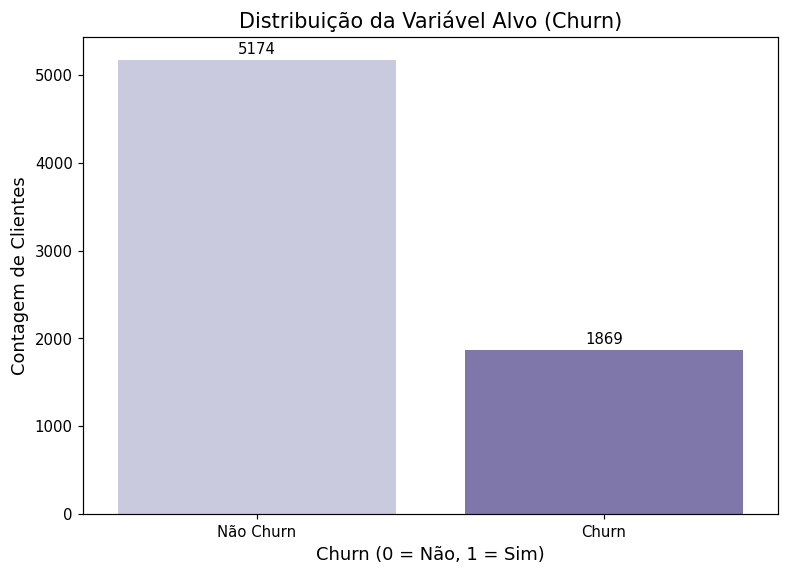

In [ ]:
print("\n--- Visualizações de Análise Exploratória (EDA) ---")

if df is not None and not df.empty and 'Churn Label' in df_processed.columns:
    plt.figure(figsize=(8, 6), dpi=100)
    ax = sns.countplot(x='Churn Label', data=df_processed, palette='Purples', hue_order=[1, 0])
    plt.title('Distribuição da Variável Alvo (Churn)', fontsize=14)
    plt.xlabel('Churn (0 = Não, 1 = Sim)', fontsize=12)
    plt.ylabel('Contagem de Clientes', fontsize=12)
    plt.xticks([0, 1], ['Não Churn', 'Churn'], fontsize=10)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=10)
    plt.tight_layout(pad=3.0)
    plt.show()
else:
    print("DataFrame is not loaded or target column not found. Cannot display Churn distribution.")



---


# **Gráfico 2: Discrepância de Cobrança vs. Churn**

Mostra se clientes com maior discrepância (pagando mais agora vs. média) tendem a fazer churn. Comparando o quanto o tempo de contrato é relavante no momento de resultar Churn.

***Tenure*** entra como o tempo de contrato do cliente com a empresa

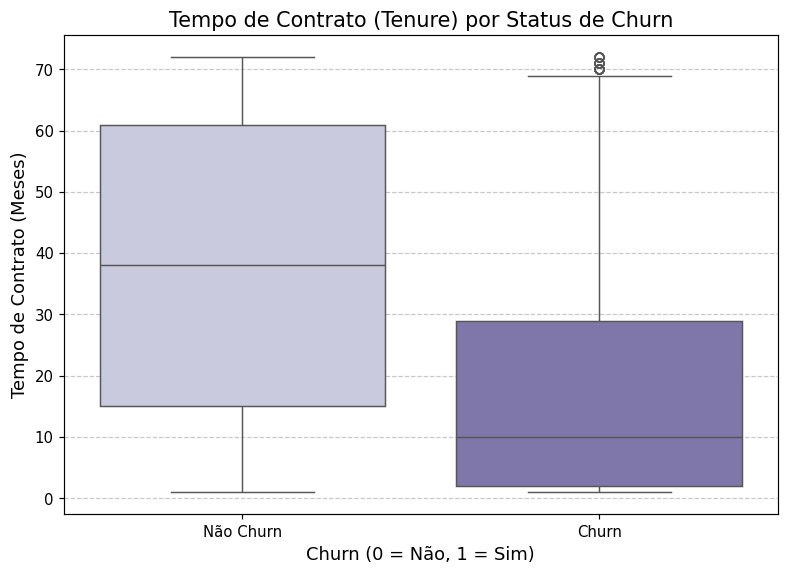

In [ ]:
if df is not None and not df.empty and 'Churn Label' in df_processed.columns and 'Tenure in Months' in df_processed.columns:
    plt.figure(figsize=(8, 6), dpi=107)
    sns.boxplot(x='Churn Label', y='Tenure in Months', data=df_processed, palette='Purples', order=[0, 1])
    plt.title('Tempo de Contrato (Tenure) por Status de Churn', fontsize=14)
    plt.xlabel('Churn (0 = Não, 1 = Sim)', fontsize=12)
    plt.ylabel('Tempo de Contrato (Meses)', fontsize=12)
    plt.xticks([0, 1], ['Não Churn', 'Churn'], fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout(pad=3.0)
    plt.show()

É evidente que quanto mais tempo o cliente passa com a empresa, maios tempo ele fica com a empresa.



---


#**Gráfico 3: Churn vs. Serviço de Internet**

Mostra o cancelamento para clientes com internet contratada, ou não

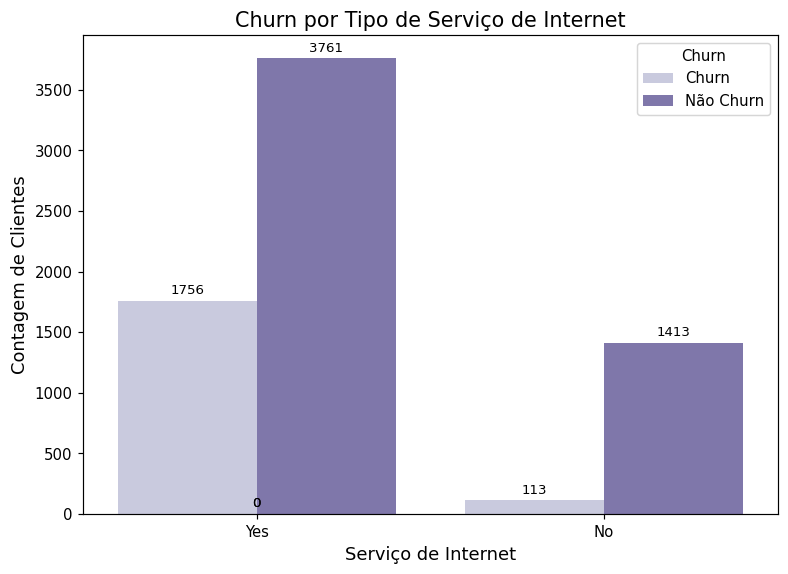

In [ ]:
if df is not None and not df.empty and 'Churn Label' in df_processed.columns and 'Internet Service' in df_processed.columns:
    plt.figure(figsize=(8, 6), dpi=107)
    ax = sns.countplot(x='Internet Service', hue='Churn Label', data=df_processed, palette='Purples', hue_order=[1, 0])
    plt.title('Churn por Tipo de Serviço de Internet', fontsize=14)
    plt.xlabel('Serviço de Internet', fontsize=12)
    plt.ylabel('Contagem de Clientes', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Churn', labels=['Churn', 'Não Churn'], fontsize=10)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=9)
    plt.tight_layout(pad=3.0)
    plt.show()



---


# **Gráfico 4: Churn vs Serviço de Telefonia**

Mostra o cancelamento para clientes com internet contratada, ou não

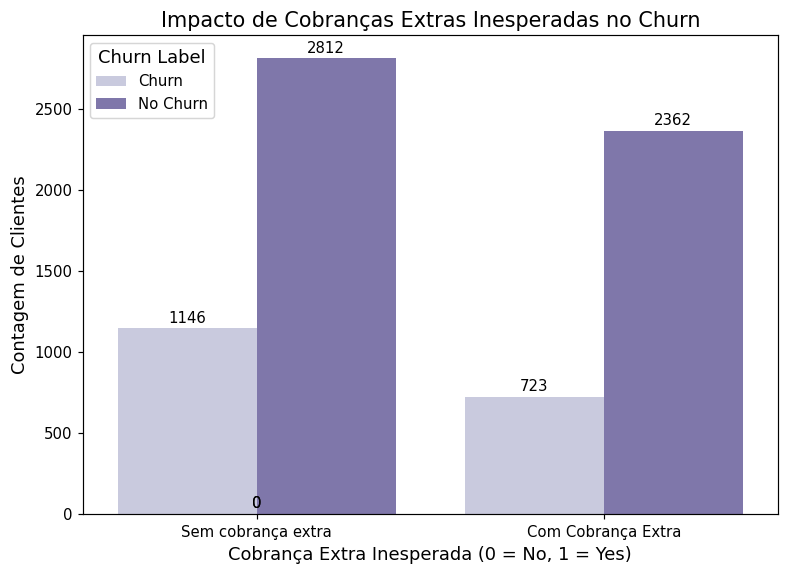

In [ ]:
if df is not None and not df.empty and 'Churn Label' in df_processed.columns and 'HasUnexpectedExtraCharge' in df_processed.columns:
    plt.figure(figsize=(8, 6), dpi=107)
    ax = sns.countplot(x='HasUnexpectedExtraCharge', hue='Churn Label', data=df_processed, palette='Purples', hue_order=[1, 0])
    plt.title('Impacto de Cobranças Extras Inesperadas no Churn', fontsize=14)
    plt.xlabel('Cobrança Extra Inesperada (0 = No, 1 = Yes)', fontsize=12)
    plt.ylabel('Contagem de Clientes', fontsize=12)
    plt.xticks([0, 1], ['Sem cobrança extra', 'Com Cobrança Extra'], fontsize=10)
    plt.legend(title='Churn Label', labels=['Churn', 'No Churn'], fontsize=10, title_fontsize=12)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=10)
    plt.tight_layout(pad=3.0)
    plt.show()

Aqui vemos que nessa base de dados em específico, a cobrança extra não foi um fator decisivo no Churn. Mostrando que esse ISP está cumprindo com o prometido em contrato de prestação de serviços.



---


# **Gráfico 5: Churn vs. Contract**

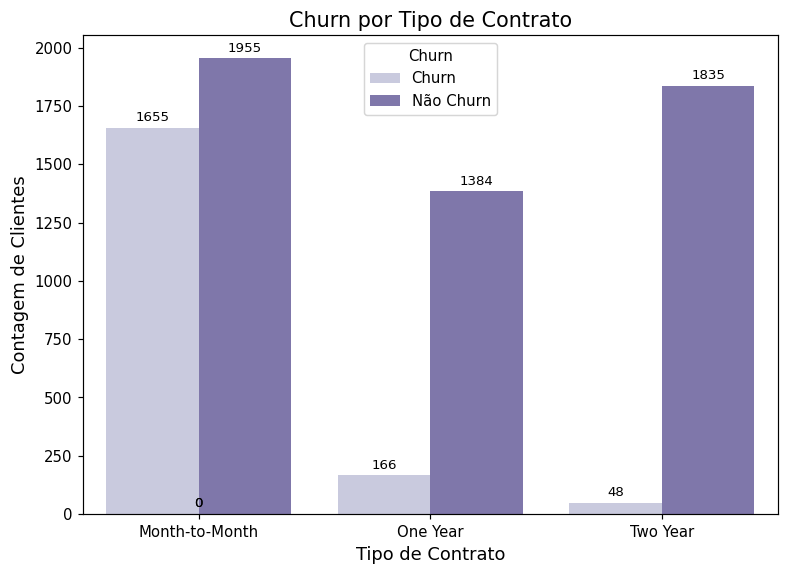

In [ ]:
if df is not None and not df.empty and 'Churn Label' in df_processed.columns and 'Contract' in df_processed.columns:
    plt.figure(figsize=(8, 6), dpi=107)
    ax = sns.countplot(x='Contract', hue='Churn Label', data=df_processed, palette='Purples', hue_order=[1, 0])
    plt.title('Churn por Tipo de Contrato', fontsize=14)
    plt.xlabel('Tipo de Contrato', fontsize=12)
    plt.ylabel('Contagem de Clientes', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Churn', labels=['Churn', 'Não Churn'], fontsize=10)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=9)
    plt.tight_layout(pad=3.0)
    plt.show()



---


# **Gráfico 6: Churn vs. Método de pagamento**


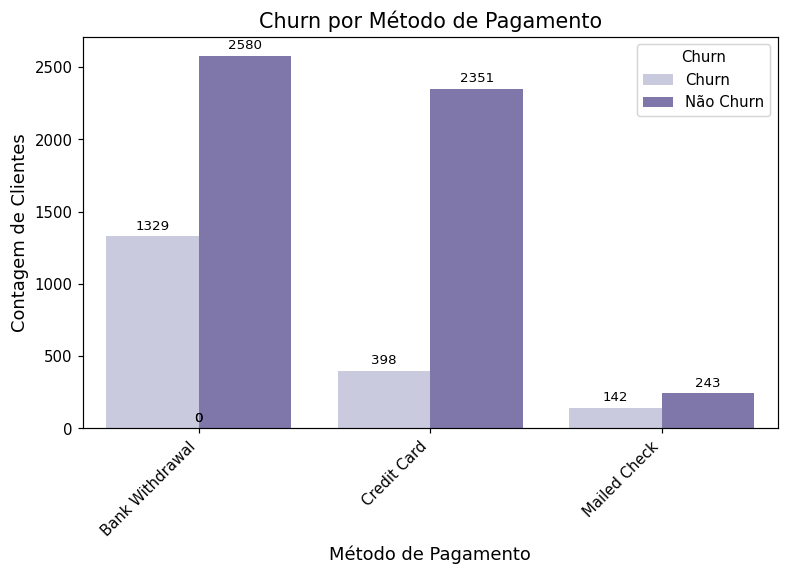

In [ ]:
if df is not None and not df.empty and 'Churn Label' in df_processed.columns and 'Payment Method' in df_processed.columns:
    plt.figure(figsize=(8, 6), dpi=107)
    ax = sns.countplot(x='Payment Method', hue='Churn Label', data=df_processed, palette='Purples', hue_order=[1, 0])
    plt.title('Churn por Método de Pagamento', fontsize=14)
    plt.xlabel('Método de Pagamento', fontsize=12)
    plt.ylabel('Contagem de Clientes', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Churn', labels=['Churn', 'Não Churn'], fontsize=10)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=9)
    plt.tight_layout(pad=3.0)
    plt.show()



---


# **Gráfico 7: Churn vs. Senioridade**


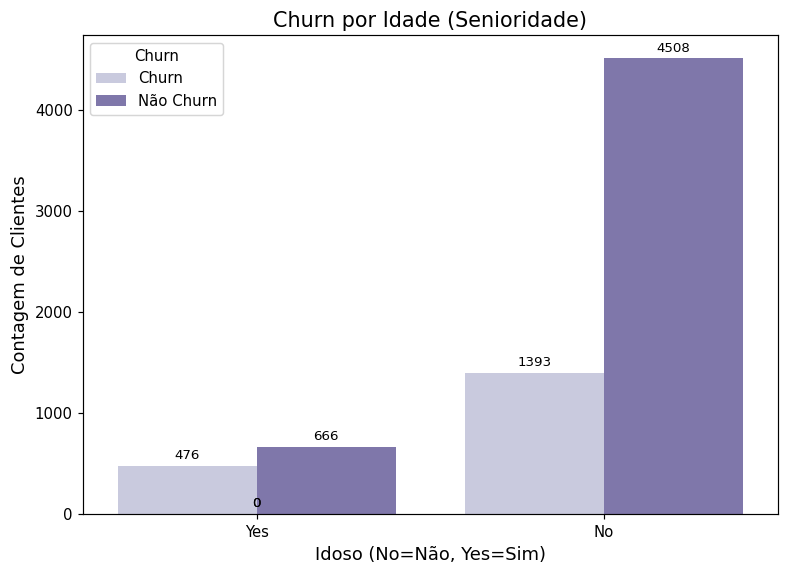

In [ ]:
if df is not None and not df.empty and 'Churn Label' in df_processed.columns and 'Senior Citizen' in df_processed.columns:
    plt.figure(figsize=(8, 6), dpi=107)
    ax = sns.countplot(x='Senior Citizen', hue='Churn Label', data=df_processed, palette='Purples', hue_order=[1, 0])
    plt.title('Churn por Idade (Senioridade)', fontsize=14)
    plt.xlabel('Idoso (No=Não, Yes=Sim)', fontsize=12)
    plt.ylabel('Contagem de Clientes', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Churn', labels=['Churn', 'Não Churn'], fontsize=10)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=9)
    plt.tight_layout(pad=3.0)
    plt.show()



---



# **Gráfico 8: Churn vs. Dependentes**

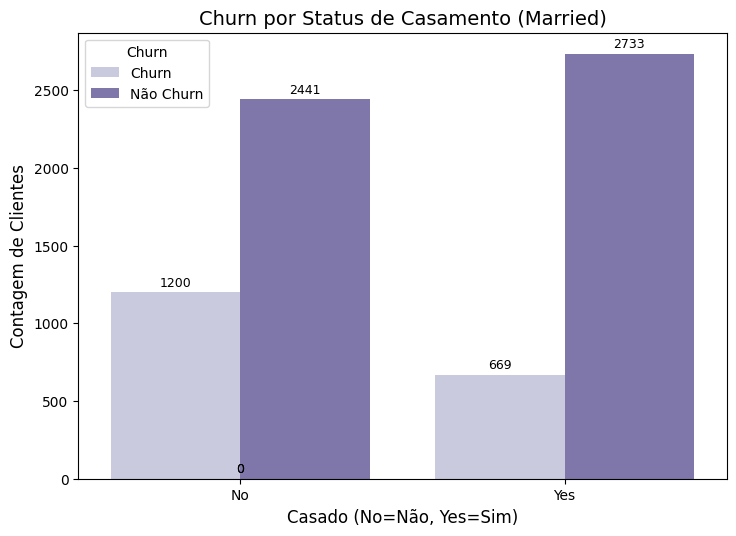

In [ ]:
if df is not None and not df.empty and 'Churn Label' in df_processed.columns and 'Married' in df_processed.columns:
    plt.figure(figsize=(8, 6), dpi=100)
    ax = sns.countplot(x='Married', hue='Churn Label', data=df_processed, palette='Purples', hue_order=[1, 0])
    plt.title('Churn por Status de Casamento (Married)', fontsize=14)
    plt.xlabel('Casado (No=Não, Yes=Sim)', fontsize=12)
    plt.ylabel('Contagem de Clientes', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Churn', labels=['Churn', 'Não Churn'], fontsize=10)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=9)
    plt.tight_layout(pad=3.0)
    plt.show()



---



# **Análise sobre a Facilidade de Implementação**

Entre um número booleano (sim/não) e uma probabilidade, a probabilidade é geralmente mais fácil de se obter e mais rica em informação para um modelo de classificação de churn.

Muitos algoritmos de classificação, como Regressão Logística, Florestas Aleatórias (Random Forests) e Gradient Boosting (XGBoost, LightGBM), naturalmente produzem uma probabilidade como saída antes de aplicar um limite para classificar como 0 ou 1. Trabalhar diretamente com a probabilidade oferece as seguintes vantagens:

**Flexibilidade:** Você pode definir o seu próprio limite de decisão. Por exemplo, se a probabilidade de churn for maior que 0.7, você pode classificar como "vai cancelar", mas pode ajustar esse limite conforme a sua necessidade de negócio (priorizar precisão, recall, etc.).

**Informação Detalhada:** Saber que um cliente tem 90% de chance de cancelar é muito mais útil do que apenas saber "sim, ele vai cancelar". Isso permite ações mais graduadas, como priorizar esforços de retenção para clientes com probabilidades muito altas.

**Implementação:** Em bibliotecas como scikit-learn em Python, você geralmente usa métodos como predict_proba() após treinar um classificador para obter as probabilidades. Se você quisesse um booleano direto, usaria predict(), mas essa é apenas uma etapa posterior da predict_proba() com um limite padrão de 0.5.

Por isto o código opta por seguir inferindo a probabilidade de churn. É mais informativo e a implementação é direta com as ferramentas de machine learning existentes.




---


# **Impacto das cobranças extras**

Como um diferencial, nesse trabalho colocamos um estudo baseado nos pagamentos do clientes incluindo se o pagamento extra ou cobranças inesperadas impactam o churn

In [ ]:
print("Columns and their data types in df_processed before plotting:")
display(df_processed.info())

Columns and their data types in df_processed before plotting:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Under 30                           7043 non-null   object 
 3   Senior Citizen                     7043 non-null   object 
 4   Married                            7043 non-null   object 
 5   Dependents                         7043 non-null   object 
 6   Number of Dependents               7043 non-null   int64  
 7   Country                            7043 non-null   object 
 8   State                              7043 non-null   object 
 9   City                               7043 non-null   object 
 10  Zip Code                           7043 non-null   int64  

None

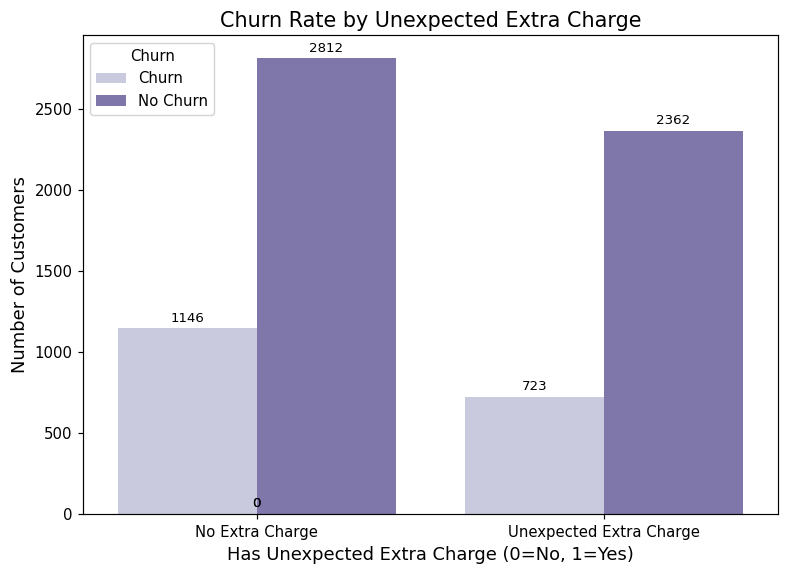

In [ ]:
if df_processed is not None and not df_processed.empty and 'HasUnexpectedExtraCharge' in df_processed.columns and 'Churn Label' in df_processed.columns:
    plt.figure(figsize=(8, 6), dpi=107)
    ax = sns.countplot(x='HasUnexpectedExtraCharge', hue='Churn Label', data=df_processed, palette='Purples', hue_order=[1, 0])
    plt.title('Churn Rate by Unexpected Extra Charge', fontsize=14)
    plt.xlabel('Has Unexpected Extra Charge (0=No, 1=Yes)', fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)
    plt.xticks([0, 1], ['No Extra Charge', 'Unexpected Extra Charge'], fontsize=10)
    plt.legend(title='Churn', labels=['Churn', 'No Churn'], fontsize=10)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=9)
    plt.tight_layout(pad=3.0)
    plt.show()



---



# **Normalização**

normalização dos dados para inferir um modelo de predição e instituir dados para ˜Churn˜ e ˜Não Churn˜



--- Avaliação do Modelo ---
Acurácia: 0.9986
Precisão: 1.0000
Recall: 0.9947
F1-Score: 0.9973
AUC-ROC: 1.0000

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      0.99      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


Matriz de Correlação:


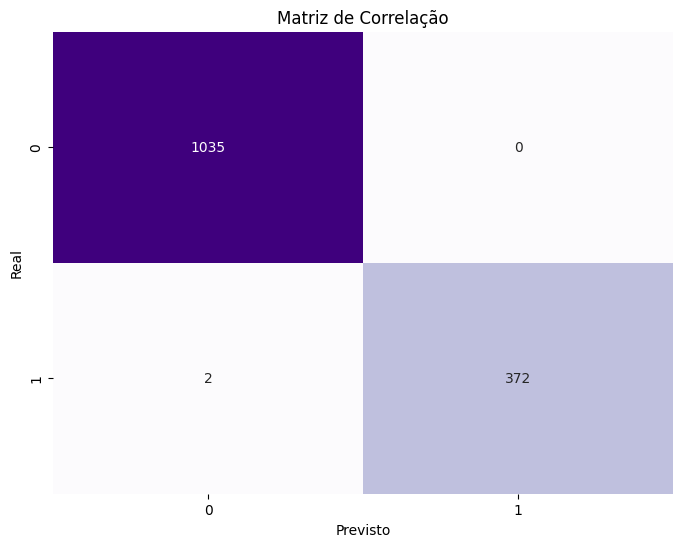

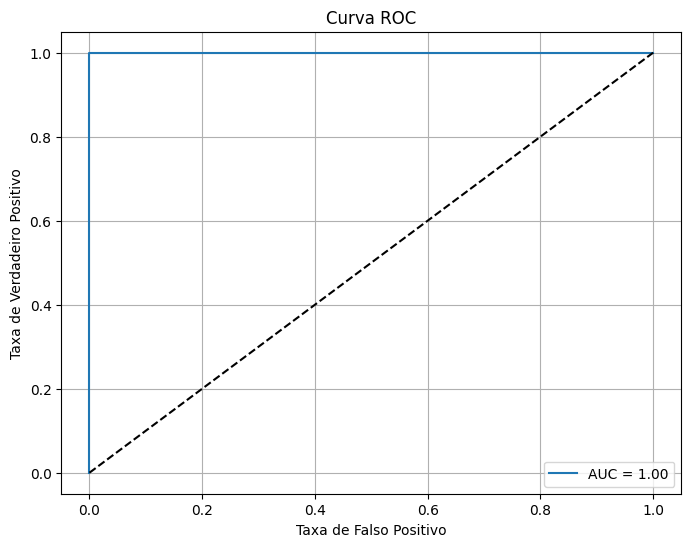

In [ ]:
X = df_processed.drop('Churn Label', axis=1)
y = df_processed['Churn Label']

numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("\n--- Avaliação do Modelo ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Correlação:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6), dpi=100)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Correlação')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()



---


# **Ofensores e padronização dos dados**

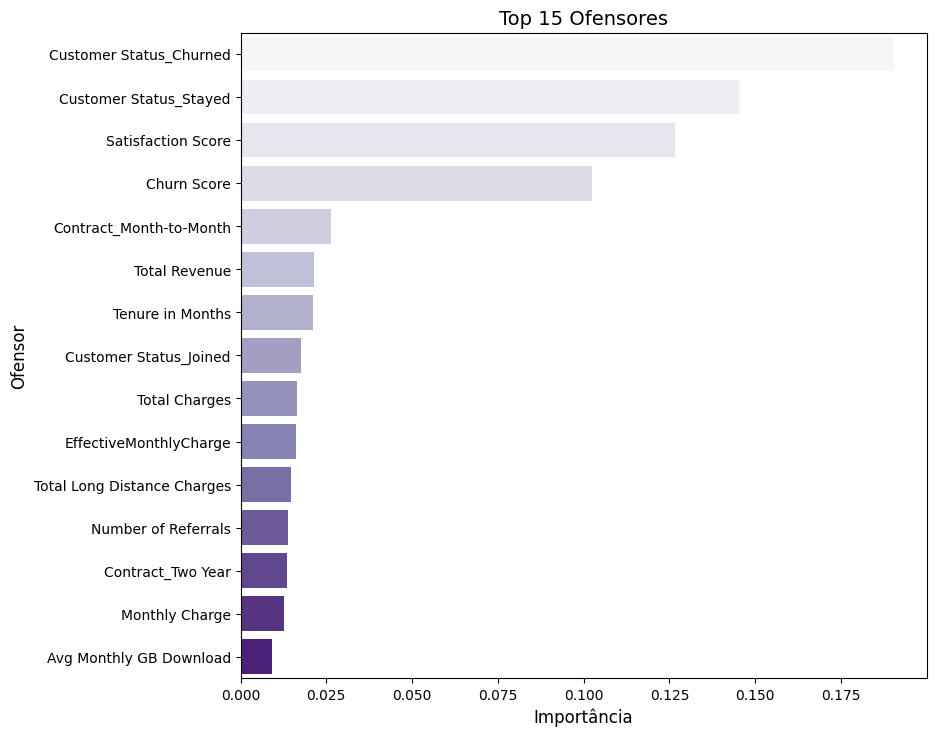

In [ ]:
if 'model' in locals() and 'numerical_features' in locals() and 'categorical_features' in locals():
    try:
        trained_model = model.named_steps['classifier']
        preprocessor = model.named_steps['preprocessor']
        numerical_features = numerical_features
        categorical_features = categorical_features
        if hasattr(preprocessor, 'transformers_'):
            onehot_features = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
            all_features = numerical_features + list(onehot_features)

            importances = trained_model.feature_importances_

            feature_importances_df = pd.DataFrame({'Feature': all_features, 'Importance': importances})

            feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

            plt.figure(figsize=(10, 8), dpi=100)
            sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(15), palette='Purples')
            plt.title('Top 15 Ofensores', fontsize=14)
            plt.xlabel('Importância', fontsize=12)
            plt.ylabel('Ofensor', fontsize=12)
            plt.tight_layout(pad=3.0)
            plt.show()

    except AttributeError as e:
        print(f"Error accessing model steps or feature names: {e}")
        print("Please ensure the model pipeline and its steps are correctly defined and the model has been fitted.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


Análise do peso de cada variável na composição do Churn, identificando os fatores que levam o cliente a cancelar o seriço (Churn)



---


# **Desenvolvimentos futuros e combinação de dados:**

Aliado ao NPS, a análise e script apresentados podem ajudar a popular datasets e habilitar a tomada de decisão baseada em dados a fim de medir a satisfação do cliente com os serviços prestados. Visto que o sentimento humano se trata de uma variável abstrata, traduzi-la em números é um desafio, por isto a maior quantidade de dados tratados, cruzados e plotados norteia e convida os stakeholders a tomarem a decisão mais assertiva e conectada com os valores e estratégias do negócio.

**Identificar Consumidores Fiéis e Avaliar a Aceitabilidade a Novos Produtos:**

Consumidores Fiéis: Após prever o churn, os clientes com probabilidade muito baixa de churn e um Tenure (tempo de relacionamento) alto podem ser considerados fiéis. Você pode usar análises de RFM (Recência, Frequência, Valor Monetário) para identificar os clientes mais valiosos e fiéis -- no sentido de os oferecer novos produtos, deixando-os mais felizes e os amarrando ainda mais sobre a mesma empresa, o que indiretamente reduzirá paulatinamente o churn devido a alta concentração de serviços.